In [1]:
import cv2
import numpy as np
from deskew import determine_skew
import math
from PIL import Image as PImage # Load the image
from IPython.display import Image, display

### code to display image

In [2]:
temp_image_path = "images/temp_image.png"

def showImage(input_img):
    cv2.imwrite(temp_image_path, input_img)
    display(Image(filename=temp_image_path))

## Change DPI

In [3]:
def changeDpi(pil_img):    
    # Set the DPI metadata for the image
    dpi_tuple = (300, 300)
    pil_img.info['dpi'] = (300, 300)

    # Save the image with the specified DPI
    pil_img.save("images/test_szotar_dpi.jpg", dpi=dpi_tuple)
    return cv2.imread("images/test_szotar_dpi.jpg", cv2.IMREAD_GRAYSCALE)

## Binarization

In [4]:
def binarizeImg(input_img):
    if input_img is None:
        print("Error: Input image is None.")
        return None

    # Check if the input image is in BGR format
    if input_img.shape[-1] == 3:
        gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    else:
        # If the image is already grayscale or in a different format, just convert it to grayscale
        gray_img = input_img

    return cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

## Skew correction
1. Calculate horizontal and vertical projection profiles
2. Find the skew angle based on the projection profiles. You can use a simple method like finding the angle with the maximum projection value
3. Correct the skew by rotating the image:

In [5]:
def rotate(input_img, background):
    img_copy = input_img.copy()
    
    # Megállapítjuk az elforgatási szöget a `determine_skew` függvénnyel
    angle = determine_skew(img_copy)
    
    # A bemeneti kép eredeti szélessége és magassága
    old_width, old_height = img_copy.shape[:2]
    print(f"w: {old_width}, h: {old_height}")

    # Az elforgatási szög radiánban
    angle_radian = math.radians(angle)
    print(f"radian angle: {angle_radian}")

    # Az új kép szélessége és magassága a forgatás után
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)
    print(f"new_w: {width}, new_h: {height}")
    
    # A kép forgatásának középpontja
    image_center = tuple(np.array(img_copy.shape[1::-1]) / 2)
    print(f"forgatasi kozeppont: {image_center}")
    
    # Forgatási mátrix létrehozása
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

    # Az eltolás hozzáadása az elforgatáshoz, hogy a kép középen maradjon
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2

    # Az elforgatott kép létrehozása
    return cv2.warpAffine(img_copy, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

## Noise removal

In [6]:
def preprocessImage(input_img, output_path):
    pre_img = changeDpi(input_img)
    pre_img = binarizeImg(pre_img)
    # Elforgatjuk a bemeneti képet az előzőleg kiszámított szöggel, fekete háttérrel
    pre_img = rotate(pre_img, (0, 0, 0))
    cv2.imwrite(output_path, pre_img.astype((np.uint8)))
    showImage(pre_img)
    return pre_img
    
    

w: 532, h: 306
radian angle: 0.0
new_w: 532.0, new_h: 306.0
forgatasi kozeppont: (153.0, 266.0)


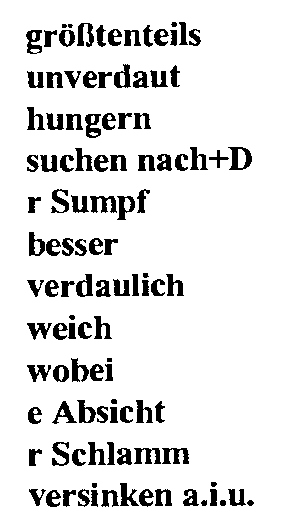

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
w: 520, h: 578
radian angle: 0.0
new_w: 520.0, new_h: 578.0
forgatasi kozeppont: (289.0, 260.0)


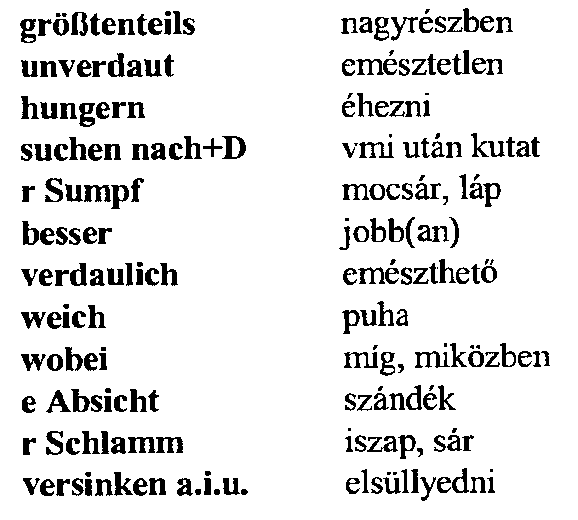

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [7]:
img_path = 'images/nemet_resz.jpg'
big_img_path = 'images/szotar_image.jpg'
img = PImage.open(img_path)
big_img = PImage.open(big_img_path)

print(preprocessImage(img, 'images/img1.jpg'))
print(preprocessImage(big_img, 'images/img2.jpg'))